The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[1, 2, 3, 11, 12, 14, 20, 27, 28, 32, 34, 36, 38, 40, 41, 42, 52, 55, 56, 58, 60, 63, 64, 68, 69, 70, 72, 75, 76, 78, 80, 84, 85, 88]


C:\Users\Erik\Anaconda3\envs\fui\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Last month:                   idx         1             2         3        11        12  \
date                                                                         
2020-06-30  0.000226  0.000006  7.854377e-07  0.000004  0.000023  0.000005   

                 14        20        27        28  ...            69  \
date                                               ...                 
2020-06-30  0.00005  0.000013  0.000006  0.000001  ...  4.697745e-07   

                      70        72        75        76        78        80  \
date                                                                         
2020-06-30  6.202426e-07  0.000003  0.000002  0.000011  0.000008  0.000008   

                  84        85        88  
date                                      
2020-06-30  0.000005  0.000005  0.000018  

[1 rows x 35 columns]


C:\projects\FUI\src\fui\utils.py:85: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  df.to_csv(os.path.join(folder_path, file_name+'.csv'), sep=';')


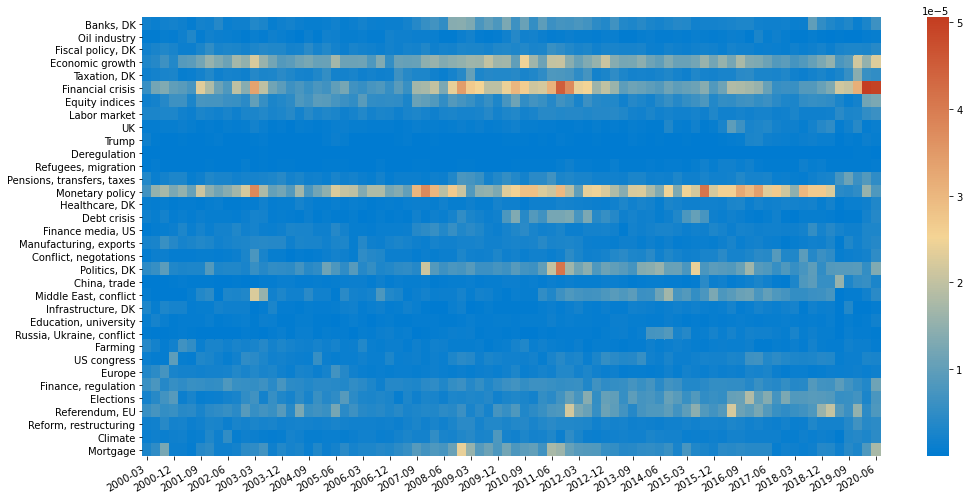

In [10]:
%load_ext autoreload
%autoreload 2
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from src.fui.indices import LDAIndexer
from src.fui.utils import params

international = LDAIndexer(name='ep')
df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q',norm=False)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter("%Y")

label_path = os.path.join(params().paths['topic_labels'],
                          'labels' + str(90) + '.json')
with codecs.open(label_path, 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)

dft=df.drop(columns = ['idx'], axis=1).transpose()
dft.columns = dft.columns.strftime('%Y-%m')

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax = sns.heatmap(dft, cmap=nbcm, linewidths=0, annot=False, xticklabels =3)
ax.set_yticklabels([labels[str(i)] for i in dft.index], rotation=0)

plt.tight_layout()
fig.autofmt_xdate()
plt.savefig('C:/projects/FUI/figures/topics_over_time_heatmap_nonorm.pdf', dpi=300)


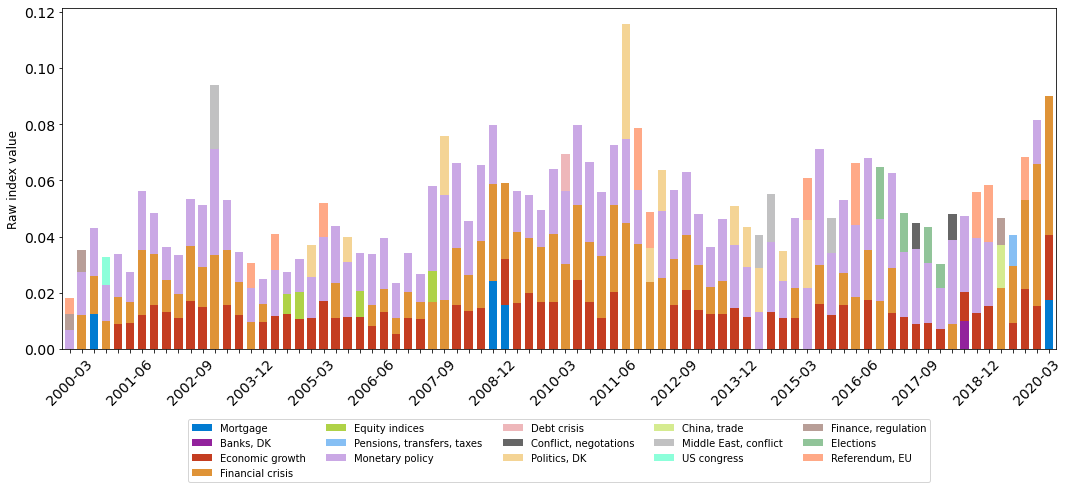

In [11]:

%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from src.fui.indices import LDAIndexer
from src.fui.utils import params

international = LDAIndexer(name='ep')
df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q',norm=False)

df_long = pd.melt(df.reset_index(), id_vars='date')
df_top = df_long.groupby('date').apply(lambda df : df.nlargest(4, 'value'))
bottom = (df.iloc[:,1:].shape[1]-3)
df_bottom = df_long.groupby('date').apply(lambda df : df.nsmallest(bottom, 'value').sum())
df_top = df_top.pivot(index='date', columns='variable', values='value')
#df_top = df_top.merge(df_bottom, left_index=True, right_index=True)

scaler = StandardScaler()
idx = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
#df_top.index = df_top.index.strftime('%Y-%m')
#df_top = df_top.merge(idx['idx'], right_index=True, left_index=True)
#df_top.iloc[:,:-1] = df_top.iloc[:,:-1].div(df_top['idx_x'], axis=0).mul(df_top['idx_y'], axis=0)

df_top = df_top.drop(['idx'], axis=1)
#df_top = df_top.loc[df_top.index >= '2007-01-01']

df_top.index = df_top.index.strftime('%Y-%m')
df_top = df_top*1000

cols = df_top.columns.tolist()
cols = cols[-1:] + cols[:-1]

df_top = df_top[cols]

label_path = os.path.join(params().paths['topic_labels'],
                          'labels' + str(90) + '.json')
with codecs.open(label_path, 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)
    
#labels['value'] = 'Other topics (sum)'


nb_colors = ['#017bd1','#92229c','#c43d21','#df9337','#afd247','#86bff4','#caa8e5','#eeb7ba','#666666','#f4d495','#d5eb90','#c1c1c2', "#8cffda", "#b89e97", "#91c499", "#ffa987", "#b5d99c"]

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)


df_top.plot.bar(stacked=True, figsize=(15,7), color=nb_colors, align='center', width=0.7)

ax = plt.gca()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.set_xticklabels([t if not i%5 else "" for i,t in enumerate(ax.get_xticklabels())])
h, l = ax.get_legend_handles_labels()
#ax.legend([labels[str(x)] for x in l], bbox_to_anchor=(1.02,1), loc="upper left", fontsize='medium')
ax.legend([labels[str(x)] for x in l], loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=False, ncol=5)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel("Raw index value", fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/projects/FUI/figures/topics_over_time_bars.pdf', dpi=300)
